In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# load dataset
df = pd.read_csv('COVID-19_Case_Surveillance_Public_Use_Data.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [3]:
#replace value Missing with NAN
df.replace('Missing', np.nan, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


In [5]:
df.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                19538
age_group                             89
Race and ethnicity (combined)     601526
hosp_yn                          3227302
icu_yn                           6178281
death_yn                         3486923
medcond_yn                       6063390
dtype: int64

<AxesSubplot:>

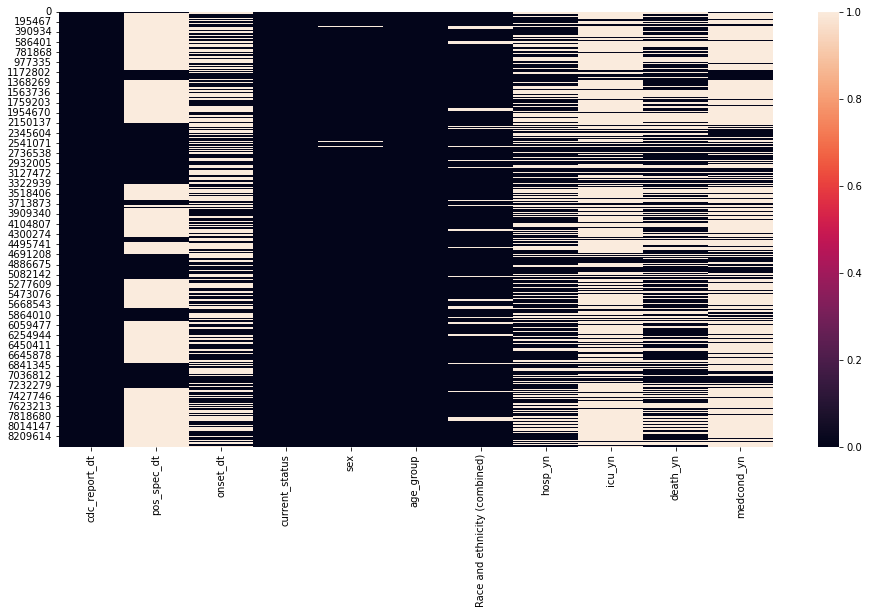

In [6]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

In [6]:
df['symptomatic_yn'] = np.where(df.onset_dt.isnull(), 'No', 'Yes')
df[0:10][['symptomatic_yn','onset_dt']]

,symptomatic_yn,onset_dt
0,No,NaN
1,Yes,2020/11/10
2,Yes,2020/11/09
3,No,NaN
4,Yes,2020/11/10
5,Yes,2020/11/08
6,No,NaN
7,No,NaN
8,No,NaN
9,No,NaN


In [7]:
df['tested_yn'] = np.where(df[['pos_spec_dt']].isnull(), 'No', 'Yes')
df[:][['tested_yn','pos_spec_dt']]

,tested_yn,pos_spec_dt
0,Yes,2020/11/10
1,Yes,2020/11/10
2,Yes,2020/11/10
3,Yes,2020/11/10
4,Yes,2020/11/10
...,...,...
8405074,No,NaN
8405075,No,NaN
8405076,No,NaN
8405077,No,NaN


In [8]:
# drop columns 'onset_dt', 'pos_spec_dt' 
df.drop(['onset_dt', 'pos_spec_dt'], axis=1, inplace=True)

In [9]:
df['cdc_report_dt'] = pd.to_datetime(df['cdc_report_dt'])

In [10]:
df.set_index('cdc_report_dt', inplace=True)
df.head()

,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,symptomatic_yn,tested_yn
cdc_report_dt,,,,,,,,,,
2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,No,Yes
2020-11-14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,Yes,Yes
2020-11-19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,Yes,Yes
2020-11-14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",NaN,NaN,No,NaN,No,Yes
2020-11-13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,Yes,Yes


In [11]:
df = df.dropna(thresh=7)

In [12]:
df.shape

(5698361, 10)

<AxesSubplot:ylabel='cdc_report_dt'>

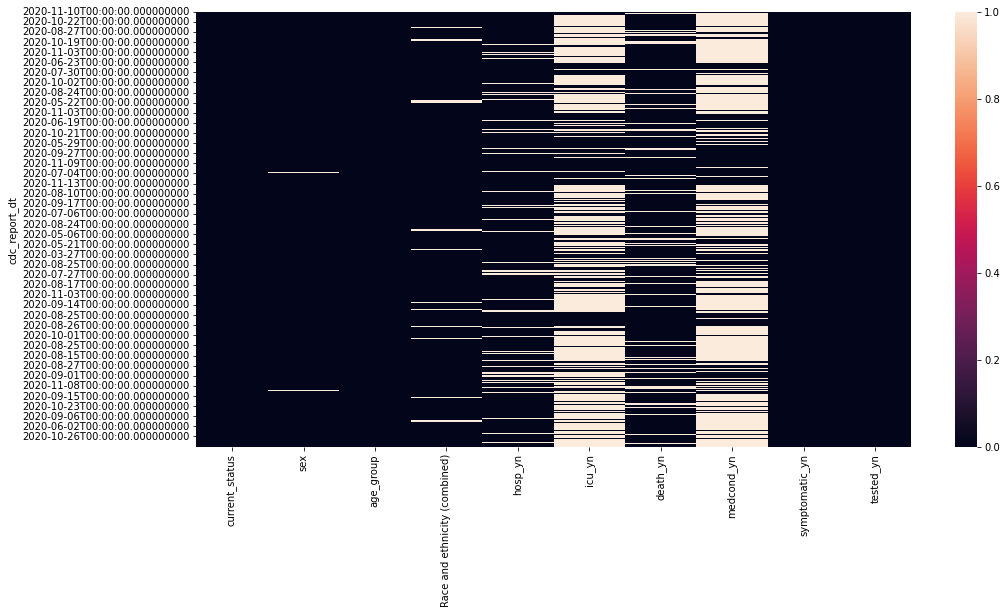

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

## Data Exploration

In [15]:
df.isnull().sum()

current_status                         0
sex                                 6078
age_group                             58
Race and ethnicity (combined)     212807
hosp_yn                           543586
icu_yn                           3471623
death_yn                          789074
medcond_yn                       3357792
symptomatic_yn                         0
tested_yn                              0
dtype: int64

In [16]:
df['symptomatic_yn'].value_counts()

Yes    3765188
No     1933173
Name: symptomatic_yn, dtype: int64

In [17]:
df['tested_yn'].value_counts()

No     3397297
Yes    2301064
Name: tested_yn, dtype: int64

In [18]:
df['current_status'].value_counts()

Laboratory-confirmed case    5430230
Probable Case                 268131
Name: current_status, dtype: int64

In [19]:
df['sex'].value_counts()

Female     2968353
Male       2692258
Unknown      31484
Other          188
Name: sex, dtype: int64

In [20]:
df['age_group'].value_counts()

20 - 29 Years    1086722
30 - 39 Years     920351
40 - 49 Years     852766
50 - 59 Years     829723
60 - 69 Years     596831
10 - 19 Years     566842
70 - 79 Years     346788
80+ Years         286823
0 - 9 Years       205602
Unknown             5855
Name: age_group, dtype: int64

In [21]:
df['Race and ethnicity (combined)'].value_counts()

White, Non-Hispanic                                     2022005
Unknown                                                 1643725
Hispanic/Latino                                          900633
Black, Non-Hispanic                                      553444
Multiple/Other, Non-Hispanic                             202833
Asian, Non-Hispanic                                      116514
American Indian/Alaska Native, Non-Hispanic               30585
Native Hawaiian/Other Pacific Islander, Non-Hispanic      15815
Name: Race and ethnicity (combined), dtype: int64

In [22]:
df['hosp_yn'].value_counts()

No         3483906
Unknown    1134615
Yes         536254
Name: hosp_yn, dtype: int64

In [23]:
df['icu_yn'].value_counts()

Unknown    1286227
No          879622
Yes          60889
Name: icu_yn, dtype: int64

In [24]:
df['death_yn'].value_counts()

No         3684851
Unknown    1042504
Yes         181932
Name: death_yn, dtype: int64

In [25]:
df['medcond_yn'].value_counts()

Unknown    837599
Yes        784972
No         717998
Name: medcond_yn, dtype: int64

In [ ]:
#df['month'] = pd.DatetimeIndex(df['cdc_report_dt']).month
#df['day'] = pd.DatetimeIndex(df['cdc_report_dt']).day
#df['month_year'] = pd.to_datetime(df['cdc_report_dt']).dt.to_period('M')

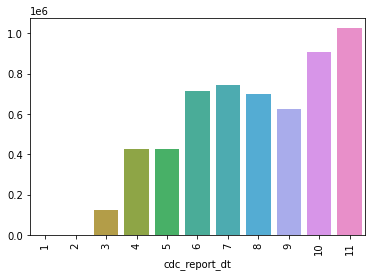

In [26]:
x = df.groupby(df.index.month).count()['current_status']
sns.barplot(x=x.index, y=x.values);
plt.xticks(rotation=90);

In [13]:
d = df.groupby([df.index]).sex.value_counts().sort_index().unstack()

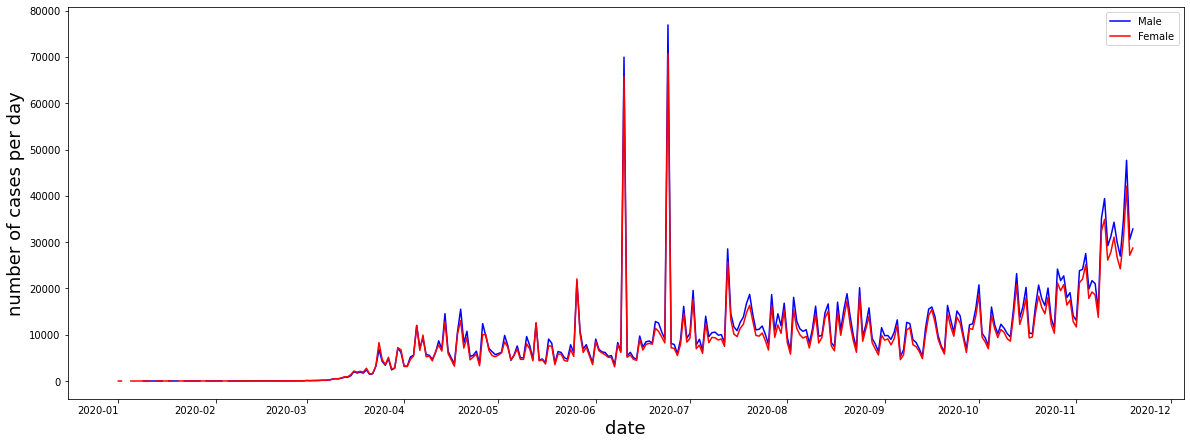

In [28]:
plt.figure(figsize=(20,8))
d.Female.plot(color='b');
d.Male.plot(color='r');
plt.xticks(rotation=0);
plt.xlabel('date', fontsize=18)
plt.ylabel('number of cases per day', fontsize=18)
plt.legend(['Male', 'Female'])

In [ ]:
#x_male = df_male.groupby('month').count()['cdc_report_dt']
#x_female = df_female.groupby('month').count()['cdc_report_dt']
#sns.lineplot(x=x_male.index, y=x_male.values, color='b');
#sns.lineplot(x=x_female.index, y=x_female.values, color='r');
#plt.xticks(rotation=90);
#plt.legend(['Male', 'Female'])

In [ ]:
sns.histplot(data=df, x="age_group");
plt.xticks(rotation=60);

In [ ]:
sns.histplot(data=df, x="Race and ethnicity (combined)");
plt.xticks(rotation=90);

In [ ]:
sns.histplot(data=df, x="sex");
plt.xticks(rotation=45);

In [ ]:
sns.histplot(data=df, x="day");
plt.xticks(rotation=90);

In [ ]:
sns.histplot(data=df, x="hosp_yn");
plt.xticks(rotation=90);

In [ ]:
sns.histplot(data=df, x="icu_yn");
plt.xticks(rotation=90);

In [ ]:
sns.histplot(data=df, x="medcond_yn");
plt.xticks(rotation=90);

In [ ]:
sns.histplot(data=df, x="death_yn");
plt.xticks(rotation=90);

In [15]:
df['age_group'].replace('Unknown', np.nan, inplace=True)
df.dropna(subset=['age_group'], inplace=True)

In [16]:
df.shape

(5692448, 10)

In [ ]:
# drop rows with Missing and Unknown and Other values from 'sex' column
#df.drop(df.loc[(df['sex'].isnull()) | (df['sex']=='Missing') | (df['sex']=='Unknown') | (df['sex']=='Other')].index, inplace=True)
#df['sex'].value_counts()

In [ ]:
# drop rows with Missing and Unknown and Other values from 'Race and ethnicity (combined)' column
#df.drop(df.loc[df['Race and ethnicity (combined)']=='Missing'].index, inplace=True)
#df['Race and ethnicity (combined)'].value_counts()

## Data Visulization

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_group', ylabel='count'>

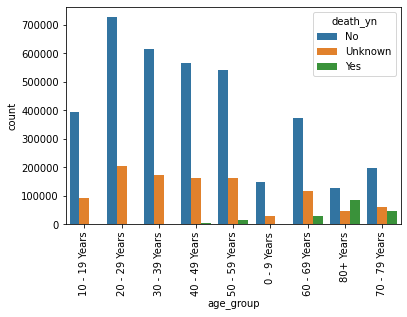

In [17]:
plt.xticks(rotation=90)
sns.countplot(df['age_group'],hue='death_yn',data=df)

In [ ]:
plt.xticks(rotation=90)
sns.countplot(df['month'],hue='death_yn',data=df)

In [ ]:
sns.countplot(df['month'],hue='hosp_yn',data=df);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


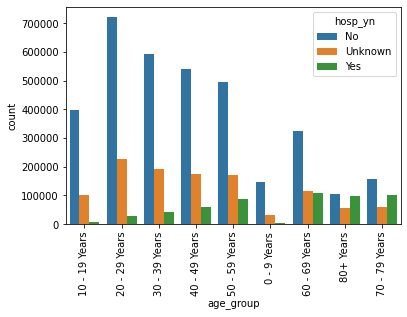

In [19]:
sns.countplot(df['age_group'],hue='hosp_yn',data=df);
plt.xticks(rotation=90);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


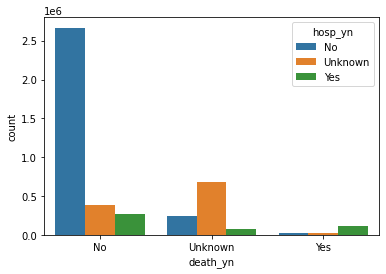

In [20]:
sns.countplot(df['death_yn'],hue='hosp_yn',data=df);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


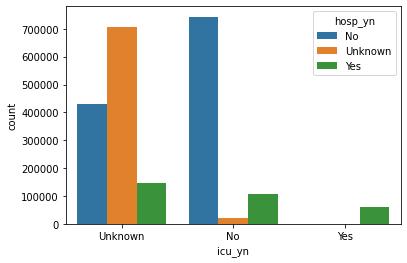

In [21]:
sns.countplot(df['icu_yn'],hue='hosp_yn',data=df);

from this figures shown that the high percentage of people who went to hospital in the first months, and most of people who wnt to hospital were older than 60 years old, and most of dead people went to hospital, and all of people who went to icu also went to hospital wich make sense. 

In [ ]:
sns.countplot(df['month'],hue='icu_yn',data=df);

In [ ]:
sns.countplot(df['month'],hue='medcond_yn',data=df);

In [22]:
age = ['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '60 - 69 Years', '70 - 79 Years', '80+ Years']

def create_list(value):
    range_age = []
    for old in value:
        sam = []
        range_old = old
        len_old_yes = len(df[(df['death_yn'] == 'Yes') & (df['age_group'] == old)])
        len_old_no = len(df[(df['death_yn'] == 'No') & (df['age_group'] == old)])
        sam.append(range_old)
        sam.append(len_old_yes)
        sam.append(len_old_no)
        range_age.append(sam)
    return range_age

## convert list to DataFrame
new_df = pd.DataFrame(create_list(age), columns=['year', 'Death', 'Alive'])

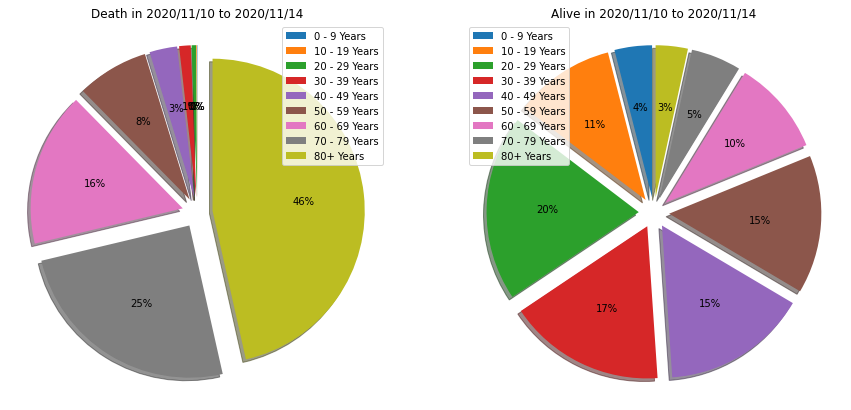

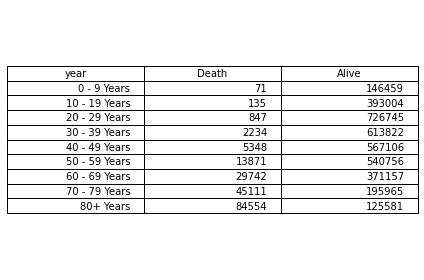

In [23]:
## Plot pie chart Dearth
plt.figure(figsize=(15, 15))
plt.subplot(121)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice
plt.pie(new_df['Death'], startangle = 90, explode=explode, autopct='%1.0f%%', shadow=True)
plt.legend(labels=new_df['year'])
plt.title("Death in 2020/11/10 to 2020/11/14")

## Plot pie chart Alive
plt.subplot(122)
plt.pie(new_df['Alive'], startangle = 90, explode=explode, autopct='%1.0f%%', shadow=True)
plt.legend(labels=new_df['year'])
plt.title("Alive in 2020/11/10 to 2020/11/14")
plt.show()

## Show Table
fig, ax = plt.subplots()
ax.table(cellText=new_df.values, colLabels=new_df.columns, loc="center")
ax.axis('off')
fig.tight_layout()
plt.show()

from this pie chart shown that most of dead people were older that 50 years old although the percentage of cases were from young people.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


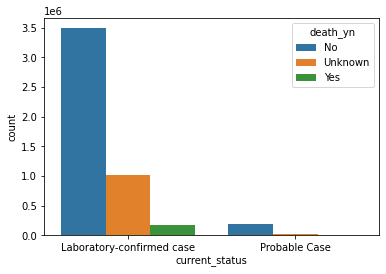

In [24]:
sns.countplot('current_status',hue='death_yn',data=df);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


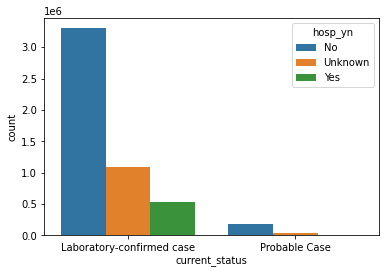

In [25]:
sns.countplot('current_status',hue='hosp_yn',data=df);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


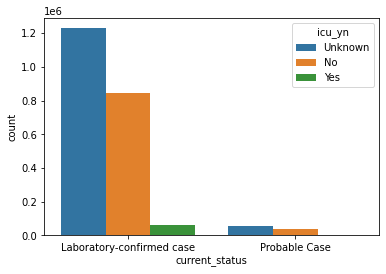

In [26]:
sns.countplot('current_status',hue='icu_yn',data=df);

## Data Preprossing 

In [27]:
df['age'] = df['age_group'].replace({'0 - 9 Years':0, '10 - 19 Years':1, '20 - 29 Years':2, '30 - 39 Years':3, '40 - 49 Years':4,
       '50 - 59 Years':5, '60 - 69 Years':6, '70 - 79 Years':7, '80+ Years':8})

In [28]:
df_encoded = pd.get_dummies(df, columns=["current_status", "sex", "symptomatic_yn", "tested_yn"], drop_first=True)
df_encoded.head()

,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,age,current_status_Probable Case,sex_Male,sex_Other,sex_Unknown,symptomatic_yn_Yes,tested_yn_Yes
cdc_report_dt,,,,,,,,,,,,,
2020-11-10,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,1,0,1,0,0,0,1
2020-11-14,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,1,0,1,0,0,1,1
2020-11-19,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,1,0,1,0,0,1,1
2020-11-14,10 - 19 Years,"Black, Non-Hispanic",NaN,NaN,No,NaN,1,0,1,0,0,0,1
2020-11-13,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,1,0,1,0,0,1,1


In [29]:
df_encoded.shape

(5692448, 13)

In [30]:
df_encoded.drop('age_group', axis=1, inplace=True)

In [31]:
df_encoded.isnull().sum()

Race and ethnicity (combined)     212613
hosp_yn                           542217
icu_yn                           3467435
death_yn                          788526
medcond_yn                       3353683
age                                    0
current_status_Probable Case           0
sex_Male                               0
sex_Other                              0
sex_Unknown                            0
symptomatic_yn_Yes                     0
tested_yn_Yes                          0
dtype: int64

In [32]:
# use RandomForestClassifier to fill the misiing values of 'hosp_yn'
rf_hosp = RandomForestClassifier(n_estimators=10)

df_hosp = pd.get_dummies(df_encoded, columns=["icu_yn", "death_yn", "medcond_yn", 'Race and ethnicity (combined)'])
train_hosp = df_hosp.loc[(df_encoded['hosp_yn'].notnull())]  # known hosp values
test_hosp = df_hosp.loc[(df_encoded['hosp_yn'].isnull())]  # all nan hosp values

features = train_hosp.drop(['hosp_yn'], axis=1)
label = train_hosp['hosp_yn']
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=.2, random_state=42)
X_test = test_hosp.drop(['hosp_yn'], axis=1)

rf_hosp.fit(X_train, y_train)

print(rf_hosp.score(X_train, y_train))
print(rf_hosp.score(X_val, y_val))

0.8472318226564639
0.845763348662731


In [33]:
# for hosp_yn column
print(confusion_matrix(y_val, rf_hosp.predict(X_val)))
print(classification_report(y_val, rf_hosp.predict(X_val)))

[[655212  33439   8275]
 [ 47279 174181   4330]
 [ 53165  12383  41783]]
              precision    recall  f1-score   support

          No       0.87      0.94      0.90    696926
     Unknown       0.79      0.77      0.78    225790
         Yes       0.77      0.39      0.52    107331

    accuracy                           0.85   1030047
   macro avg       0.81      0.70      0.73   1030047
weighted avg       0.84      0.85      0.84   1030047



In [34]:
df_encoded.loc[(df_encoded['hosp_yn'].isnull(), 'hosp_yn')] = rf_hosp.predict(X_test)

In [ ]:
sns.histplot(data=df_encoded, x="hosp_yn", color='r');
sns.histplot(data=df, x="hosp_yn", color='b');
plt.xticks(rotation=90);

In [36]:
# use RandomForestClassifier to fill the misiing values of 'medcond_yn'
rf_medcond = RandomForestClassifier(n_estimators=10)

df_medcond = pd.get_dummies(df_encoded, columns=["icu_yn", "death_yn", "hosp_yn", 'Race and ethnicity (combined)'])
train_medcond = df_medcond.loc[(df_encoded['medcond_yn'].notnull())]  # known medcond values
test_medcond = df_medcond.loc[(df_encoded['medcond_yn'].isnull())] # all nan medcond values

features = train_medcond.drop(['medcond_yn'], axis=1)
label = train_medcond['medcond_yn']
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=.2, random_state=42)
X_test = test_medcond.drop(['medcond_yn'], axis=1)

rf_medcond.fit(X_train, y_train)

print(rf_medcond.score(X_train, y_train))
print(rf_medcond.score(X_val, y_val))

0.7087009596945396
0.702011531727215


In [37]:
# for medcond_yn column
print(confusion_matrix(y_val, rf_medcond.predict(X_val)))
print(classification_report(y_val, rf_medcond.predict(X_val)))

[[104859   7060  31789]
 [ 19856 126659  20864]
 [ 45031  14785  96850]]
              precision    recall  f1-score   support

          No       0.62      0.73      0.67    143708
     Unknown       0.85      0.76      0.80    167379
         Yes       0.65      0.62      0.63    156666

    accuracy                           0.70    467753
   macro avg       0.71      0.70      0.70    467753
weighted avg       0.71      0.70      0.70    467753



In [38]:
df_encoded.loc[(df_encoded['medcond_yn'].isnull(), 'medcond_yn')] = rf_medcond.predict(X_test)

In [ ]:
#df_encoded['medcond_yn'].value_counts()

In [ ]:
sns.histplot(data=df_encoded, x="medcond_yn", color='r');
sns.histplot(data=df, x="medcond_yn", color='b');
plt.xticks(rotation=90);

In [39]:
# use RandomForestClassifier to fill the misiing values of 'icu_yn'
rf_icu = RandomForestClassifier(n_estimators=10)

df_icu = pd.get_dummies(df_encoded, columns=["medcond_yn", "death_yn", "hosp_yn",'Race and ethnicity (combined)'])
train_icu = df_icu.loc[(df_encoded['icu_yn'].notnull())]  # known icu values
test_icu = df_icu.loc[(df_encoded['icu_yn'].isnull())]  # all nan icu values

features = train_icu.drop('icu_yn', axis=1)
label = train_icu['icu_yn']
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=.2, random_state=42)
X_test = test_icu.drop('icu_yn', axis=1)

rf_icu.fit(X_train, y_train)

print(rf_icu.score(X_train, y_train))
print(rf_icu.score(X_val, y_val))

0.8293307340969994
0.8266663370808736


In [40]:
# for icu_yn column
print(confusion_matrix(y_val, rf_icu.predict(X_val)))
print(classification_report(y_val, rf_icu.predict(X_val)))

[[151134  23691   1179]
 [ 42130 213573   1262]
 [  4777   4095   3162]]
              precision    recall  f1-score   support

          No       0.76      0.86      0.81    176004
     Unknown       0.88      0.83      0.86    256965
         Yes       0.56      0.26      0.36     12034

    accuracy                           0.83    445003
   macro avg       0.74      0.65      0.67    445003
weighted avg       0.83      0.83      0.82    445003



In [41]:
df_encoded.loc[(df_encoded['icu_yn'].isnull(), 'icu_yn')] = rf_icu.predict(X_test)

In [ ]:
#df_encoded['icu_yn'].value_counts()

In [ ]:
sns.histplot(data=df_encoded, x="icu_yn", color='r');
sns.histplot(data=df, x="icu_yn", color='b');
plt.xticks(rotation=90);

In [42]:
# use RandomForestClassifier to fill the misiing values of 'Race and ethnicity (combined)'
rf_race = RandomForestClassifier(n_estimators=10)

df_race = pd.get_dummies(df_encoded, columns=["icu_yn", "death_yn", "medcond_yn", 'hosp_yn'])
train_race = df_race.loc[(df_encoded['Race and ethnicity (combined)'].notnull())]  # known hosp values
test_race = df_race.loc[(df_encoded['Race and ethnicity (combined)'].isnull())]  # all nan hosp values

features = train_race.drop(['Race and ethnicity (combined)'], axis=1)
label = train_race['Race and ethnicity (combined)']
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=.2, random_state=42)
X_test = test_race.drop(['Race and ethnicity (combined)'], axis=1)

rf_race.fit(X_train, y_train)

print(rf_race.score(X_train, y_train))
print(rf_race.score(X_val, y_val))

0.5283623959480532
0.526848892348036


In [43]:
# for Race column
print(confusion_matrix(y_val, rf_race.predict(X_val)))
print(classification_report(y_val, rf_race.predict(X_val)))

[[   233      6    481    599     18      1   1117   3675]
 [    11    779    471   2163     46      0   6186  13567]
 [    67     67  18134  10215    117      0  20792  61391]
 [    36    270   3075  32356    101      2  43865  99765]
 [    25     37   1676   2900    771      0   8645  26674]
 [     4     42    162    210      2      5    424   2305]
 [    52    275   2450  11275    106      3 192134 121606]
 [    91    217   5895  14225    185      1  50967 332997]]
                                                      precision    recall  f1-score   support

         American Indian/Alaska Native, Non-Hispanic       0.45      0.04      0.07      6130
                                 Asian, Non-Hispanic       0.46      0.03      0.06     23223
                                 Black, Non-Hispanic       0.56      0.16      0.25    110783
                                     Hispanic/Latino       0.44      0.18      0.26    179470
                        Multiple/Other, Non-Hispanic    

In [44]:
df_encoded.loc[(df_encoded['Race and ethnicity (combined)'].isnull(), 'Race and ethnicity (combined)')] = rf_race.predict(X_test)

In [ ]:
sns.histplot(data=df_encoded, x="Race and ethnicity (combined)", color='r');
sns.histplot(data=df, x="Race and ethnicity (combined)", color='b');
plt.xticks(rotation=90);

In [45]:
# use RandomForestClassifier to fill the misiing values of 'death_yn'
rf_death = RandomForestClassifier(n_estimators=10)

df_death = pd.get_dummies(df_encoded, columns=["medcond_yn", "icu_yn", "hosp_yn", 'Race and ethnicity (combined)'])
train_death = df_death.loc[(df_encoded['death_yn'].notnull())]  
test_death = df_death.loc[(df_encoded['death_yn'].isnull())]  

features = train_death.drop('death_yn', axis=1)
label = train_death['death_yn']
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=.2, random_state=42)
X_test = test_death.drop('death_yn', axis=1)

rf_death.fit(X_train, y_train)

print(rf_death.score(X_train, y_train))
print(rf_death.score(X_val, y_val))

0.8738427946819088
0.8724348353614707


In [46]:
# for death_yn column
print(confusion_matrix(y_val, rf_death.predict(X_val)))
print(classification_report(y_val, rf_death.predict(X_val)))

[[681869  49862   4683]
 [ 50785 153027   3983]
 [ 10746   5055  20775]]
              precision    recall  f1-score   support

          No       0.92      0.93      0.92    736414
     Unknown       0.74      0.74      0.74    207795
         Yes       0.71      0.57      0.63     36576

    accuracy                           0.87    980785
   macro avg       0.79      0.74      0.76    980785
weighted avg       0.87      0.87      0.87    980785



In [47]:
df_encoded.loc[(df_encoded['death_yn'].isnull(), 'death_yn')] = rf_death.predict(X_test)

In [48]:
df_encoded['death_yn'].value_counts()

No         4341551
Unknown    1146195
Yes         204702
Name: death_yn, dtype: int64

In [ ]:
sns.histplot(data=df_encoded, x="death_yn", color='r');
sns.histplot(data=df, x="death_yn", color='b');
plt.xticks(rotation=90);

In [49]:
df_encoded.head()

,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,age,current_status_Probable Case,sex_Male,sex_Other,sex_Unknown,symptomatic_yn_Yes,tested_yn_Yes
cdc_report_dt,,,,,,,,,,,,
2020-11-10,"Black, Non-Hispanic",No,Unknown,No,No,1,0,1,0,0,0,1
2020-11-14,"Black, Non-Hispanic",No,No,No,No,1,0,1,0,0,1,1
2020-11-19,"Black, Non-Hispanic",No,No,No,No,1,0,1,0,0,1,1
2020-11-14,"Black, Non-Hispanic",No,Unknown,No,No,1,0,1,0,0,0,1
2020-11-13,"Black, Non-Hispanic",No,No,No,Yes,1,0,1,0,0,1,1


In [50]:
df_encoded.to_csv('final_data.csv', index=False)

## Classification Models

In [51]:
# #df_final = pd.read_csv('final_data.csv')
df_final = df_encoded
df_final.head()

,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,age,current_status_Probable Case,sex_Male,sex_Other,sex_Unknown,symptomatic_yn_Yes,tested_yn_Yes
cdc_report_dt,,,,,,,,,,,,
2020-11-10,"Black, Non-Hispanic",No,Unknown,No,No,1,0,1,0,0,0,1
2020-11-14,"Black, Non-Hispanic",No,No,No,No,1,0,1,0,0,1,1
2020-11-19,"Black, Non-Hispanic",No,No,No,No,1,0,1,0,0,1,1
2020-11-14,"Black, Non-Hispanic",No,Unknown,No,No,1,0,1,0,0,0,1
2020-11-13,"Black, Non-Hispanic",No,No,No,Yes,1,0,1,0,0,1,1


In [52]:
df_final.isnull().sum()

Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
age                              0
current_status_Probable Case     0
sex_Male                         0
sex_Other                        0
sex_Unknown                      0
symptomatic_yn_Yes               0
tested_yn_Yes                    0
dtype: int64

In [53]:
df_final = pd.get_dummies(df_final, columns=['hosp_yn','icu_yn','medcond_yn', 'Race and ethnicity (combined)'], drop_first=True)
df_final.head()

,death_yn,age,current_status_Probable Case,sex_Male,sex_Other,sex_Unknown,symptomatic_yn_Yes,tested_yn_Yes,hosp_yn_Unknown,hosp_yn_Yes,...,icu_yn_Yes,medcond_yn_Unknown,medcond_yn_Yes,"Race and ethnicity (combined)_Asian, Non-Hispanic","Race and ethnicity (combined)_Black, Non-Hispanic",Race and ethnicity (combined)_Hispanic/Latino,"Race and ethnicity (combined)_Multiple/Other, Non-Hispanic","Race and ethnicity (combined)_Native Hawaiian/Other Pacific Islander, Non-Hispanic",Race and ethnicity (combined)_Unknown,"Race and ethnicity (combined)_White, Non-Hispanic"
cdc_report_dt,,,,,,,,,,,,,,,,,,,,,
2020-11-10,No,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-11-14,No,1,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-11-19,No,1,0,1,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-11-14,No,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2020-11-13,No,1,0,1,0,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [54]:
df_final.shape

(5692448, 21)

In [55]:
features = df_final.drop('death_yn', axis=1)
label = df_final['death_yn']
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [64]:
models = []

In [58]:

def evaluate_models(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    return cm, acc
    

In [59]:
def plot_cm(cm, title=''):
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No', 'Unknown', 'Yes'], yticklabels=['No', 'Unknown', 'Yes'], cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

**Random Forest Classifier**

In [60]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.891400842959026
0.8897732962081354


              precision    recall  f1-score   support

          No       0.93      0.94      0.93    867870
     Unknown       0.76      0.76      0.76    229510
         Yes       0.75      0.61      0.67     41110

    accuracy                           0.89   1138490
   macro avg       0.81      0.77      0.79   1138490
weighted avg       0.89      0.89      0.89   1138490



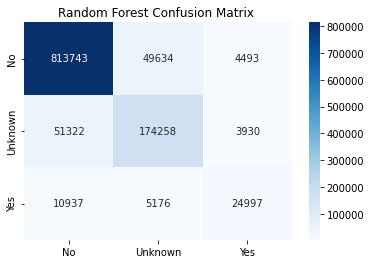

In [65]:
y_pred_rf = rf.predict(X_test)
cm_rf, acc_rf = evaluate_models(y_test, y_pred_rf)
plot_cm(cm_rf, 'Random Forest Confusion Matrix ')
models.append(['Random Forest', acc_rf])

**AdaBoost Classifier**

In [66]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred_ada = clf.predict(X_test)

              precision    recall  f1-score   support

          No       0.89      0.91      0.90    867870
     Unknown       0.66      0.64      0.65    229510
         Yes       0.62      0.55      0.58     41110

    accuracy                           0.84   1138490
   macro avg       0.72      0.70      0.71   1138490
weighted avg       0.84      0.84      0.84   1138490



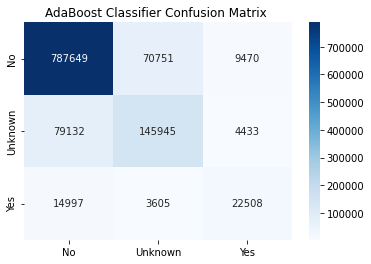

In [67]:
cm_ada, acc_ada = evaluate_models(y_test, y_pred_ada)
plot_cm(cm_ada, 'AdaBoost Classifier Confusion Matrix ')
models.append(['AdaBoost', acc_ada])

**Decision Tree**

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

              precision    recall  f1-score   support

          No       0.93      0.94      0.93    867870
     Unknown       0.76      0.76      0.76    229510
         Yes       0.75      0.61      0.67     41110

    accuracy                           0.89   1138490
   macro avg       0.81      0.77      0.79   1138490
weighted avg       0.89      0.89      0.89   1138490



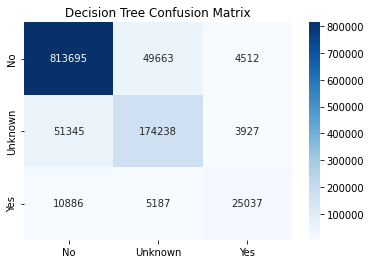

In [69]:
cm_dt, acc_dt = evaluate_models(y_test, y_pred_dtc)
plot_cm(cm_dt, 'Decision Tree Confusion Matrix')
models.append(['Decision Tree', acc_dt])

**Neural Network**

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.python.ops.numpy_ops import np_utils
from tensorflow.python.keras.utils import np_utils

In [71]:
pmap = {'No':0,'Unknown':1,'Yes':2}
df_final['death'] = df_final['death_yn'].map(pmap)
df_final.head()

,death_yn,age,current_status_Probable Case,sex_Male,sex_Other,sex_Unknown,symptomatic_yn_Yes,tested_yn_Yes,hosp_yn_Unknown,hosp_yn_Yes,...,medcond_yn_Unknown,medcond_yn_Yes,"Race and ethnicity (combined)_Asian, Non-Hispanic","Race and ethnicity (combined)_Black, Non-Hispanic",Race and ethnicity (combined)_Hispanic/Latino,"Race and ethnicity (combined)_Multiple/Other, Non-Hispanic","Race and ethnicity (combined)_Native Hawaiian/Other Pacific Islander, Non-Hispanic",Race and ethnicity (combined)_Unknown,"Race and ethnicity (combined)_White, Non-Hispanic",death
cdc_report_dt,,,,,,,,,,,,,,,,,,,,,
2020-11-10,No,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-11-14,No,1,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-11-19,No,1,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-11-14,No,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2020-11-13,No,1,0,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [75]:
features_nn = df_final.drop(['death_yn', 'death'], axis=1)
label_nn = df_final['death']
y = np_utils.to_categorical(label_nn)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(features_nn, y, test_size=0.2, random_state=42)

In [79]:
y_train_nn.shape

(4553958, 3)

In [80]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_nn.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_train_nn.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=64)
eva_train = model.evaluate(X_train_nn, y_train_nn)
eva_train

2021-10-09 10:57:20.810795: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-09 10:57:20.813826: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-09 10:57:20.813862: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-09 10:57:20.813905: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f0ba4bbfcc7b): /proc/driver/nvidia/version does not exist
2021-10-09 10:57:20.816089: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Epoch 1/10
71156/71156 [==============================] - 123s 2ms/step - loss: 0.3232 - accuracy: 0.8755
Epoch 2/10
71156/71156 [==============================] - 123s 2ms/step - loss: 0.2960 - accuracy: 0.8863
Epoch 3/10
71156/71156 [==============================] - 124s 2ms/step - loss: 0.2928 - accuracy: 0.8876
Epoch 4/10
71156/71156 [==============================] - 122s 2ms/step - loss: 0.2917 - accuracy: 0.8882
Epoch 5/10
71156/71156 [==============================] - 125s 2ms/step - loss: 0.2911 - accuracy: 0.8883
Epoch 6/10
71156/71156 [==============================] - 122s 2ms/step - loss: 0.2909 - accuracy: 0.8883
Epoch 7/10
71156/71156 [==============================] - 122s 2ms/step - loss: 0.2900 - accuracy: 0.8887
Epoch 8/10
71156/71156 [==============================] - 123s 2ms/step - loss: 0.2899 - accuracy: 0.8886
Epoch 9/10
71156/71156 [==============================] - 124s 2ms/step - loss: 0.2891 - accuracy: 0.8888
Epoch 10/10
142312/142312 [===================

[0.28881776332855225, 0.8892631530761719]

In [82]:
y_pred_nn = model.predict(X_test_nn)
y_test_nn = y_test_nn.argmax(1)
y_pred_nn = np.argmax(y_pred_nn, axis=1)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93    867870
           1       0.76      0.75      0.76    229510
           2       0.74      0.59      0.66     41110

    accuracy                           0.89   1138490
   macro avg       0.81      0.76      0.78   1138490
weighted avg       0.89      0.89      0.89   1138490



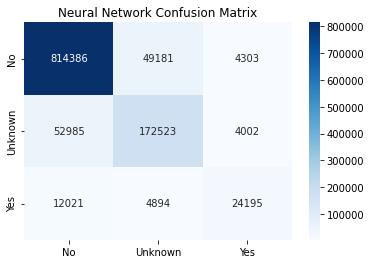

In [83]:
cm_nn, acc_nn = evaluate_models(y_test_nn, y_pred_nn)
plot_cm(cm_nn, 'Neural Network Confusion Matrix')
models.append(['Neural Network', acc_nn])

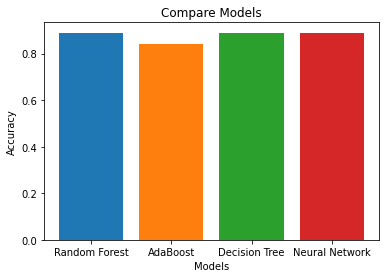

In [84]:
# plt.figure(figsize=(7, 5))
for model in models:
    plt.bar(model[0], model[1])

plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Compare Models')
plt.show()